In [212]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [213]:
# def laplacian_of_gaussian(image, sigma):
#     """Apply Laplacian of Gaussian (LoG) filter."""
#     # Create Gaussian kernel
#     size = int(2 * np.ceil(3 * sigma) + 1)  # kernel size
#     gaussian_kernel = cv.getGaussianKernel(size, sigma)
#     gaussian_kernel = gaussian_kernel @ gaussian_kernel.T  # 2D kernel
#     log_kernel = cv.Laplacian(gaussian_kernel, cv.CV_64F)
#     filtered_image = cv.filter2D(image, cv.CV_64F, log_kernel)
#     return filtered_image

def laplacian_of_gaussian(sigma: float) -> np.ndarray:

    size = int(2 * np.ceil(3 * sigma) + 1)
        
    # Create a grid of (x, y) coordinates
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)

    # Compute the Laplacian of Gaussian
    laplacian = ((x**2 + y**2 - 2 * sigma**2)/sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

    # Normalize the LoG kernel
    # Plot in 3-D
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.plot_surface(x, y, laplacian, cmap='coolwarm')
    # ax.set_title('2D Gaussian Kernel')
    # ax.set_xlabel('X-axis')
    # ax.set_ylabel('Y-axis')
    # ax.set_zlabel('G(X,Y)')
    # plt.show()
    
    return laplacian 

In [214]:
print(laplacian_of_gaussian(3))

[[ 1.97455687e-03  4.47793603e-03  9.08665952e-03  1.65378311e-02
   2.70849609e-02  4.00885062e-02  5.39035760e-02  6.62212295e-02
   7.47282522e-02  7.77629758e-02  7.47282522e-02  6.62212295e-02
   5.39035760e-02  4.00885062e-02  2.70849609e-02  1.65378311e-02
   9.08665952e-03  4.47793603e-03  1.97455687e-03]
 [ 4.47793603e-03  9.97318465e-03  1.98187769e-02  3.52228279e-02
   5.61915356e-02  8.09005516e-02  1.05880207e-01  1.27074805e-01
   1.41113876e-01  1.46001448e-01  1.41113876e-01  1.27074805e-01
   1.05880207e-01  8.09005516e-02  5.61915356e-02  3.52228279e-02
   1.98187769e-02  9.97318465e-03  4.47793603e-03]
 [ 9.08665952e-03  1.98187769e-02  3.84021287e-02  6.62212295e-02
   1.01979446e-01  1.41113876e-01  1.77183857e-01  2.04677244e-01
   2.21072085e-01  2.26398265e-01  2.21072085e-01  2.04677244e-01
   1.77183857e-01  1.41113876e-01  1.01979446e-01  6.62212295e-02
   3.84021287e-02  1.98187769e-02  9.08665952e-03]
 [ 1.65378311e-02  3.52228279e-02  6.62212295e-02  1.09

In [215]:
def find_scale_space_extrema(image, sigmas):
    """Detect circles by finding extrema in the scale-space."""
    # Store results
    detected_circles = []
    
    # Loop through different sigma values
    for sigma in sigmas:
        laplacian_kernel = laplacian_of_gaussian(sigma)

        filtered_image = cv.filter2D(image, cv.CV_64F, laplacian_kernel)
        filtered_image_uint8 = np.clip(filtered_image, 0, 255).astype(np.uint8)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 3, 1)
        plt.title('filtered_image1')
        plt.imshow(cv.cvtColor(filtered_image_uint8, cv.COLOR_BGR2RGB))
        plt.axis('off')


        
        # Normalize the filtered image
        filtered_image = cv.normalize(filtered_image_uint8, None, 0, 255, cv.NORM_MINMAX)

        plt.subplot(1, 3, 2)
        plt.title('filtered_image2')
        plt.imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))
        plt.axis('off')
        
        

        # Threshold to find strong responses
        # Use Otsu's method to find the optimal threshold
        _, thresh_image = cv.threshold(np.uint8(filtered_image), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
        # Use Canny edge detection
        # thresh_image = cv.Canny(np.uint8(filtered_image), 50, 150)

        # thresh_image = cv.adaptiveThreshold(np.uint8(filtered_image), 255,
        #                             cv.ADAPTIVE_THRESH_GAUSSIAN_C,
        #                             cv.THRESH_BINARY, 11, 2)



        
        plt.subplot(1, 3, 3)
        plt.title('thresh_image')
        plt.imshow(cv.cvtColor(thresh_image, cv.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        # Find contours in the thresholded image
        contours, _ = cv.findContours(thresh_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


        
        # Iterate through contours to find circles
        for contour in contours:
            if len(contour) >= 5:  # Need at least 5 points to fit a circle
                (x, y), radius = cv.minEnclosingCircle(contour)
                detected_circles.append((int(x), int(y), int(radius), sigma))
    print("Hello")            
    print(detected_circles)            
    
    return detected_circles

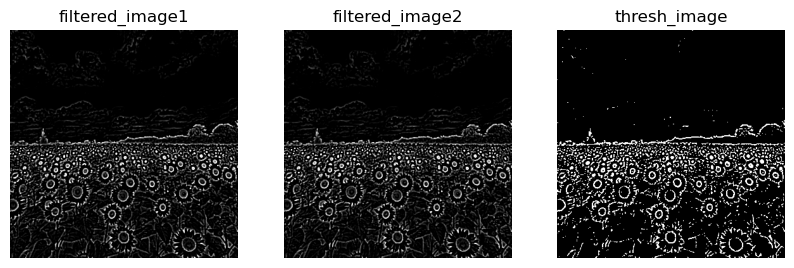

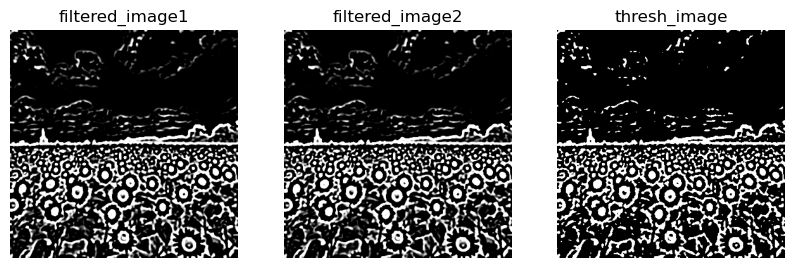

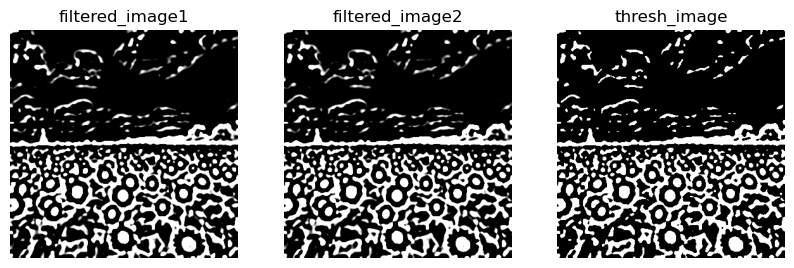

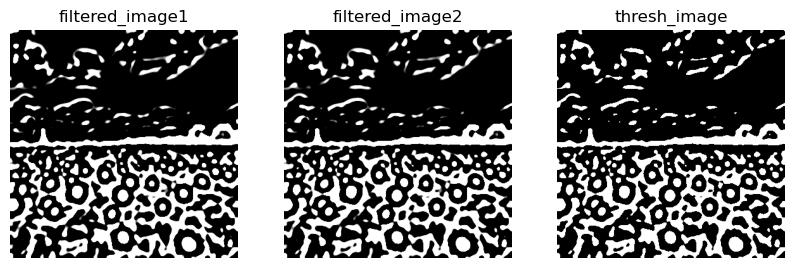

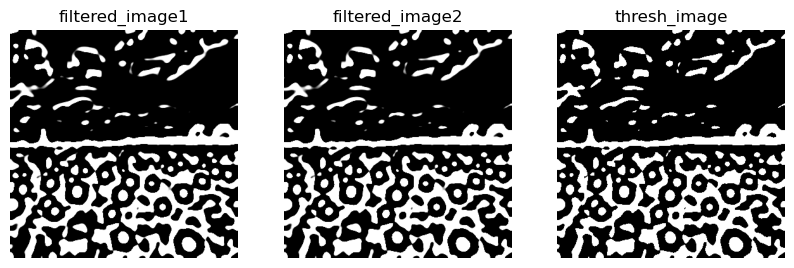

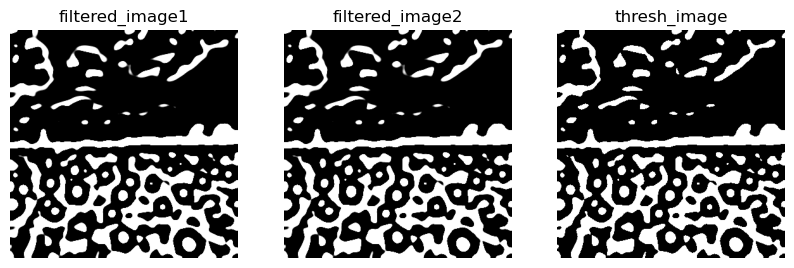

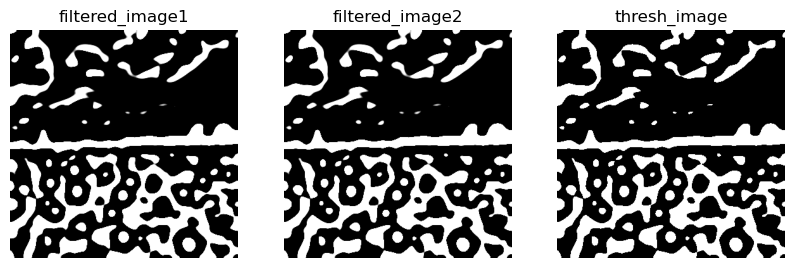

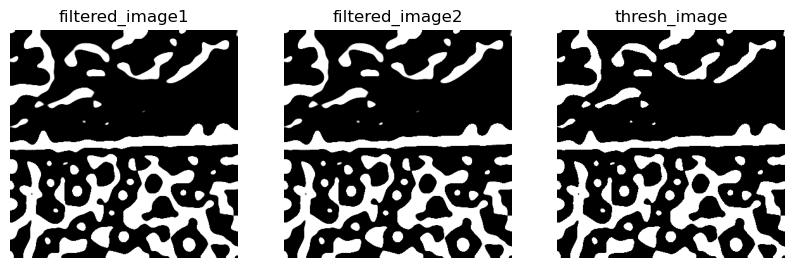

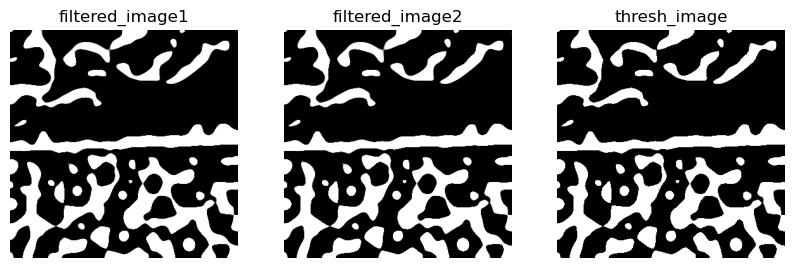

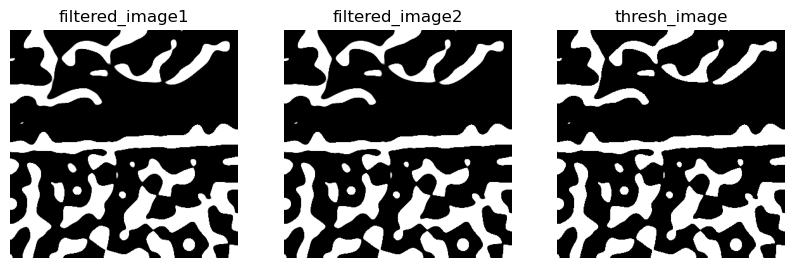

Hello
[(61, 358, 1, 1.0), (116, 356, 3, 1.0), (269, 357, 3, 1.0), (160, 357, 6, 1.0), (297, 356, 3, 1.0), (244, 354, 3, 1.0), (301, 353, 2, 1.0), (108, 352, 1, 1.0), (317, 353, 5, 1.0), (26, 355, 4, 1.0), (250, 351, 1, 1.0), (240, 353, 5, 1.0), (33, 352, 3, 1.0), (212, 349, 4, 1.0), (65, 351, 3, 1.0), (236, 350, 3, 1.0), (186, 347, 2, 1.0), (169, 347, 2, 1.0), (22, 351, 7, 1.0), (201, 345, 1, 1.0), (260, 348, 5, 1.0), (164, 345, 1, 1.0), (193, 346, 5, 1.0), (177, 346, 6, 1.0), (350, 350, 10, 1.0), (310, 344, 5, 1.0), (120, 344, 7, 1.0), (303, 338, 4, 1.0), (250, 337, 1, 1.0), (243, 337, 1, 1.0), (72, 339, 3, 1.0), (61, 337, 3, 1.0), (38, 341, 6, 1.0), (158, 339, 5, 1.0), (260, 337, 6, 1.0), (100, 333, 2, 1.0), (82, 336, 4, 1.0), (344, 337, 6, 1.0), (165, 331, 1, 1.0), (78, 336, 5, 1.0), (282, 337, 12, 1.0), (130, 332, 4, 1.0), (196, 333, 5, 1.0), (77, 330, 2, 1.0), (284, 328, 2, 1.0), (237, 329, 2, 1.0), (213, 328, 6, 1.0), (156, 331, 6, 1.0), (330, 334, 13, 1.0), (261, 326, 3, 1.0), (

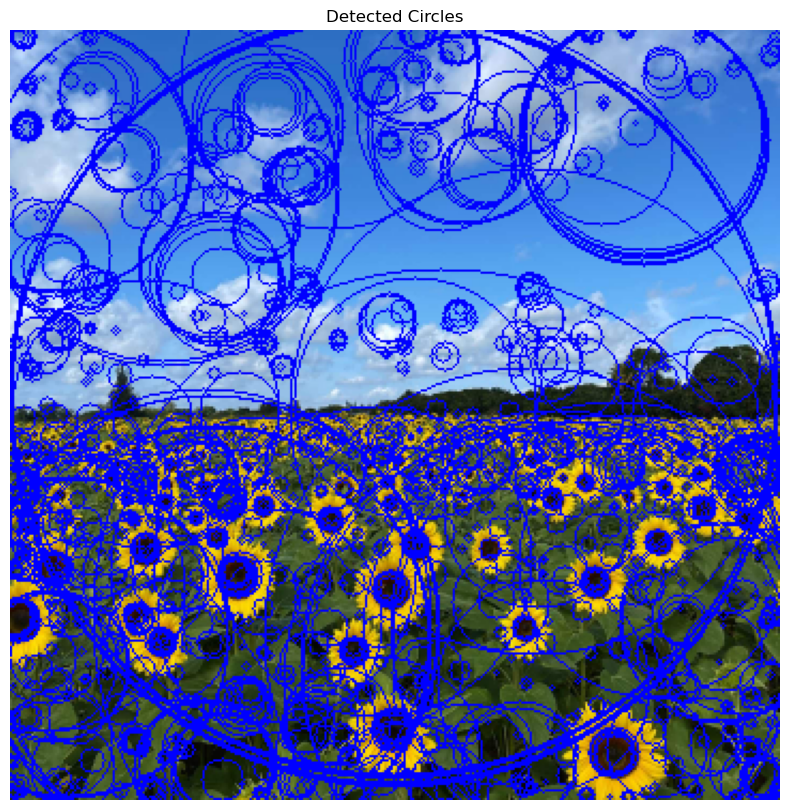

Range of sigma values used: 1.0 to 10.0


In [216]:
# Load the image
im = cv.imread('../images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
if im is None:
    raise FileNotFoundError("Image not found. Please check the file path.")

# Convert to grayscale
gray_im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Define the range of sigma values
sigmas = np.linspace(1, 10, 10)  # You can adjust the range and number of values

# Find circles in the image
detected_circles = find_scale_space_extrema(gray_im, sigmas)

# Report the parameters of the largest circles
largest_circles = sorted(detected_circles, key=lambda x: x[2], reverse=True)[:5]  # Get the largest 5 circles

print("Parameters of the largest circles (x, y, radius, sigma):")
for circle in largest_circles:
    print(circle)

# Draw the detected circles
output_image = im.copy()
for (x, y, radius, sigma) in detected_circles:
    cv.circle(output_image, (x, y), radius, (255, 0, 0), 1)
    

# Display the original image and the output image
plt.figure(figsize=(10, 10))
# plt.subplot(2, 1, 1)
# plt.title('Original Image')
# plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
# plt.axis('off')

# plt.subplot(2, 1, 2)
plt.title('Detected Circles')
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

# Report the range of sigma values used
print(f"Range of sigma values used: {sigmas[0]} to {sigmas[-1]}")